# Generate CSV dataset file

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

from utils import flatten_bbox, get_no_and_multiple_bbox, separate_single_multiple_df, plot_images_conf

import sys
sys.path.append("../")

from data_pipeline.megadetector.utils import crop_bbox

## French dataset

**Don't forget to generate bounding boxes**.  
Execute the following commands in a compute node:
- `srun --ntasks=1 --gres=gpu:1 --ntasks-per-node=1 --nodes=1 --hint=nomultithread --qos=qos_gpu-dev --account=ads@v100 --cpus-per-task 8 --pty bash`
- `source setup_env.sh`
- `python $LYNX_PROJECT/data_pipeline/megadetector/MegaDetector/detection/run_detector_batch.py $LYNX_PROJECT/data_pipeline/megadetector/md_v5a.0.0.pt "$ALL_CCFRSCRATCH/datasets/extracted/Deep learning lynx - data/0_dataset_raw" /gpfsscratch/rech/ads/commun/datasets/extracted/bbox_france.json --recursive --quiet --threshold 0.1`

In [2]:
DATASET_PATH = "/gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw"

In [3]:
individual_folders = os.listdir(DATASET_PATH)

In [4]:
dataset_dict = {
    "filepath": [],
    "lynx_id": [],
    "source": [],
    "pattern": [],
    "date": [],
    "location": [],
    "image_number": []
}

In [5]:
def parse_filename(filename):
    filename = filename.split(".")[0]
    parts = filename.split("_")
    
    return {"id_lynx": parts[0], "source": parts[1], "pattern": parts[2], "date": parts[3], "location": parts[4], "image_number": parts[5]}

In [6]:
for current_directory, _, files in os.walk(DATASET_PATH):
    if "0_dataset_Marie_3_individus" in current_directory :
        continue

    for file in files:
        absolute_path = os.path.abspath(os.path.join(current_directory, file))
        if file.endswith((".txt", ".xlsx", ".db")):
            continue
        if file.startswith(('broken')):
            print(file)
            continue
        if '.ipynb_checkpoints' in absolute_path:
            print(file)
            continue
            
        try:
            parsed_filename = parse_filename(file)
        except:
            print(absolute_path)  # TODO: problem with these filenames
            continue  # skip them
            
        dataset_dict["filepath"].append(absolute_path)
        dataset_dict["lynx_id"].append(parsed_filename["id_lynx"])
        dataset_dict["source"].append(parsed_filename["source"])
        dataset_dict["pattern"].append(parsed_filename["pattern"])
        dataset_dict["date"].append(parsed_filename["date"])
        dataset_dict["location"].append(parsed_filename["location"])
        dataset_dict["image_number"].append(parsed_filename["image_number"])

1308_OFB_OCELLES_2018-08-04_Giron_2-checkpoint.jpg
1015_OFB_OCELLES_2017-07-13_Jougnes_3-checkpoint.JPG
1015_OFB_OCELLES_2017-07-13_Jougnes_1-checkpoint.jpg
1015_OFB_OCELLES_2017-07-13_Jougnes_2-checkpoint.JPG


In [7]:
df_france = pd.DataFrame(dataset_dict)
df_france

filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3323  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3324  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3325  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3326  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3327  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern        date     location image_number  
0         NA  2012-04-27           NA            5  
1         NA  2012-05-05           NA            1  
2         NA  2012-03-17           NA            3  
3         NA  2012-03-16           NA            6  
4         NA  2012-03-05           NA            7  
...      ...         ...          ...          ...  
3323   SPOTS  2015-07-21      Goumois            4  
3324   SPOTS  2015-07-21      Goumois            3  
3325   SPOTS  2015-07-21      Goumois            1  
3326   SPOTS  2017-08-08  Chaux-Neuve            2  
3327   SPOTS  2017-08-08  Chaux-Neuve            1  

[3328 rows x 7 columns]

**Convert the values in the "date" column into datetime**. The format most often found is YYYY-MM-DD but sometimes day and month are reversed. Some other strange dates are also printed (replaced by NaT).
  
**Note**: NA values are replaced by nan values recognised by pd.isna when the csv is saved.

In [8]:
from datetime import datetime

def convert_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        try:
            return datetime.strptime(date_str, "%Y-%d-%m")
        except ValueError:
            print(date_str)
            return None
        
df_france["date"] = df_france["date"].apply(convert_date)
df_france

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
2021
2021
2021
2021
2021
2021-13-13
2021-13-13
NA
NA
NA
NA
2022
2022
2022
2022
NA
NA
NA
NA
2019
2019
NA
NA


filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3323  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3324  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3325  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3326  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3327  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern       date     location image_number  
0         NA 2012-04-27           NA            5  
1         NA 2012-05-05           NA            1  
2         NA 2012-03-17           NA            3  
3         NA 2012-03-16           NA            6  
4         NA 2012-03-05           NA            7  
...      ...        ...          ...          ...  
3323   SPOTS 2015-07-21      Goumois            4  
3324   SPOTS 2015-07-21      Goumois            3  
3325   SPOTS 2015-07-21      Goumois            1  
3326   SPOTS 2017-08-08  Chaux-Neuve            2  
3327   SPOTS 2017-08-08  Chaux-Neuve            1  

[3328 rows x 7 columns]

#### Deleting broken images

In [9]:
all_files_exist = all(df_france['filepath'].apply(os.path.exists))
all_files_exist

True

#### Bounding boxes

In [10]:
with open('/gpfsscratch/rech/ads/commun/datasets/extracted/bbox_france.json', 'r') as f:
    bbox_france = json.load(f)

Some images may not have bounding boxes found.

In [11]:
no_bbox_france, multiple_bbox_france = get_no_and_multiple_bbox(bbox_france)

7 images have no bounding boxes detected.
436 images have several bounding boxes detected.
Total: 3328 images.


Sometimes the length is not identical between bbox_france and df_france. To do this, we look for differences.

In [12]:
all_file_megadetector = []
for img in bbox_france['images']:
    all_file_megadetector.append(img['file']) 
print(len(all_file_megadetector))

all_file_df_france = df_france['filepath'].to_list()
print(len(all_file_df_france))

3328
3328


In [13]:
set(all_file_df_france) - set(all_file_megadetector)

set()

Back to bbox...

In [14]:
df_bbox_france = flatten_bbox(bbox_france)
df_bbox_france

No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_1764/1764_OFB_OCELLES_2020-09-26_Meussia_4.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_2446/2446_OFB_OCELLES_2021-04-18_Les-Molunes_6.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_2446/2446_OFB_OCELLES_2021-04-18_Les-Molunes_7.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_F01-025/F01-025_OFB_OCELLES_2014-12-31_Boyeux-Saint-Jerome_5.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_PIXEL/PIXEL_OFB_OCELLES_2020-11-20_Jussy_2.jpg
No bbox in /gpfsscratch/rech/ads/commun/data

file category   conf  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.904   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.958   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.937   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.925   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.960   
...                                                 ...      ...    ...   
3857  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.936   
3858  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.951   
3859  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.953   
3860  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.958   
3861  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.942   

            x        y    width  height  
0     0.25760  0.08421  0.48600  0.6726  
1     0.46410  0.41200  0.09092  0.1022  
2     0.20780  0.46060  0.08138  0.1030  
3     0.16790  0.30830  0.37180  0.2865  
4     0.04640  0.09513  0.53590  0.5096  
...       ...      ...      ...     ...  
3857  0.13150  0.41830  0.19480  0.1451  
3858  0.07861  0.42250  0.28270  0.2109  
3859  0.37490  0.35990  0.32630  0.3350  
3860  0.37800  0.47950  0.34680  0.2284  
3861  0.11770  0.06250  0.69830  0.8604  

[3862 rows x 7 columns]

#### 10 images cropped with the least confidence are displayed

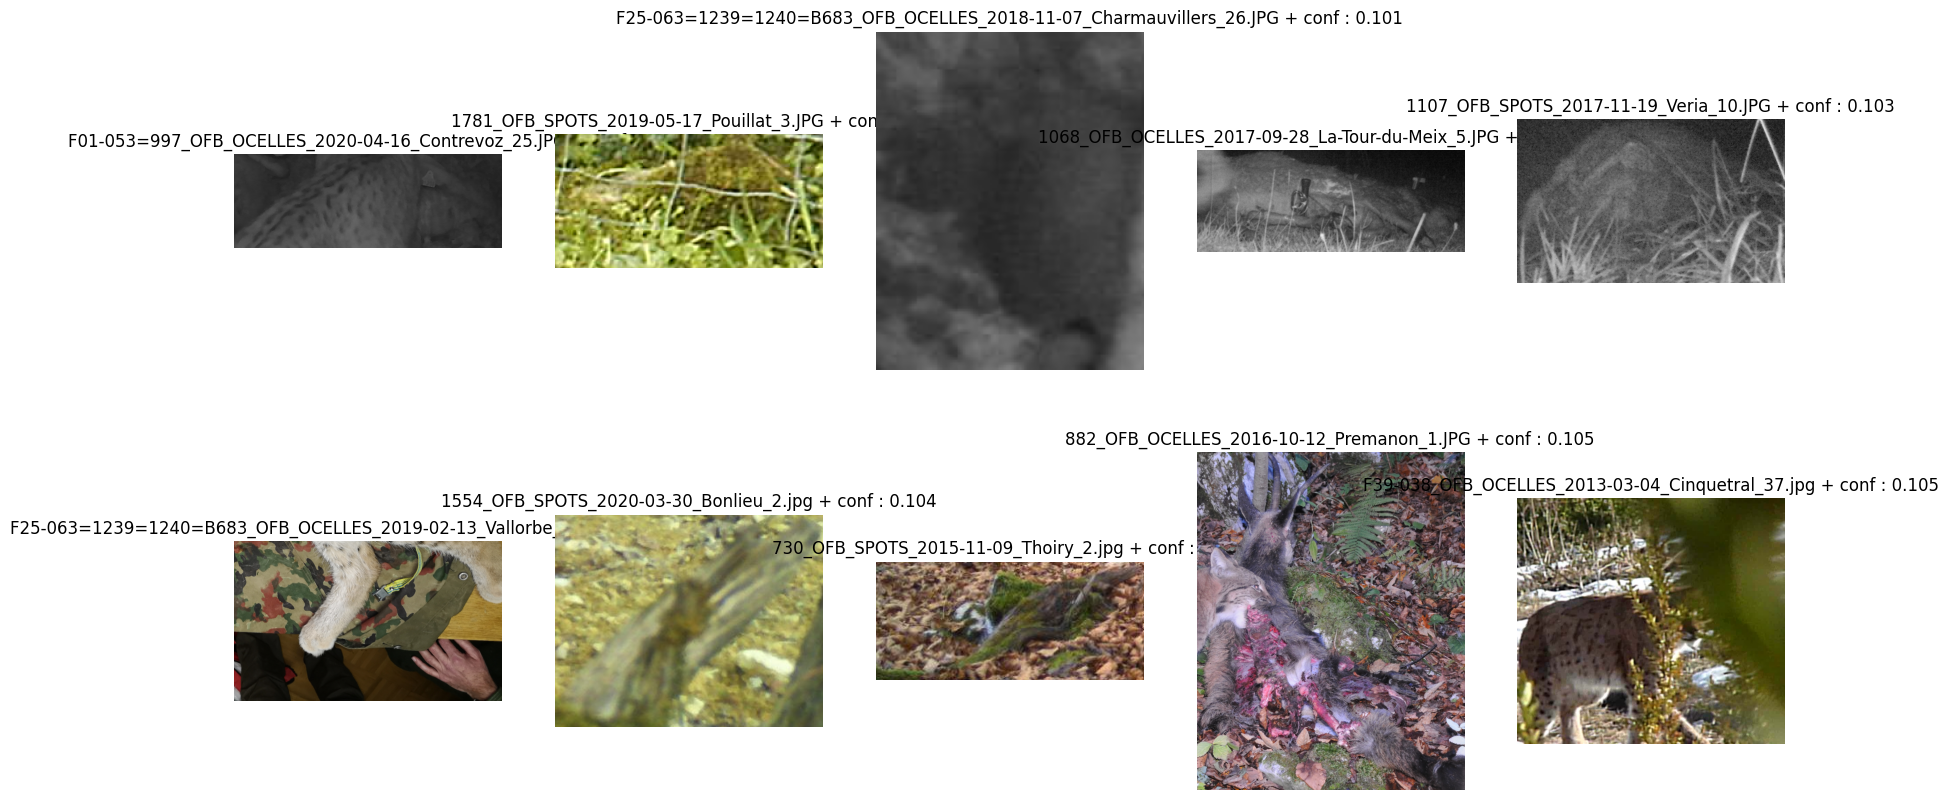

In [15]:
plot_images_conf(df_bbox_france, by="smallest")

#### 10 images cropped with the largest confidence are displayed

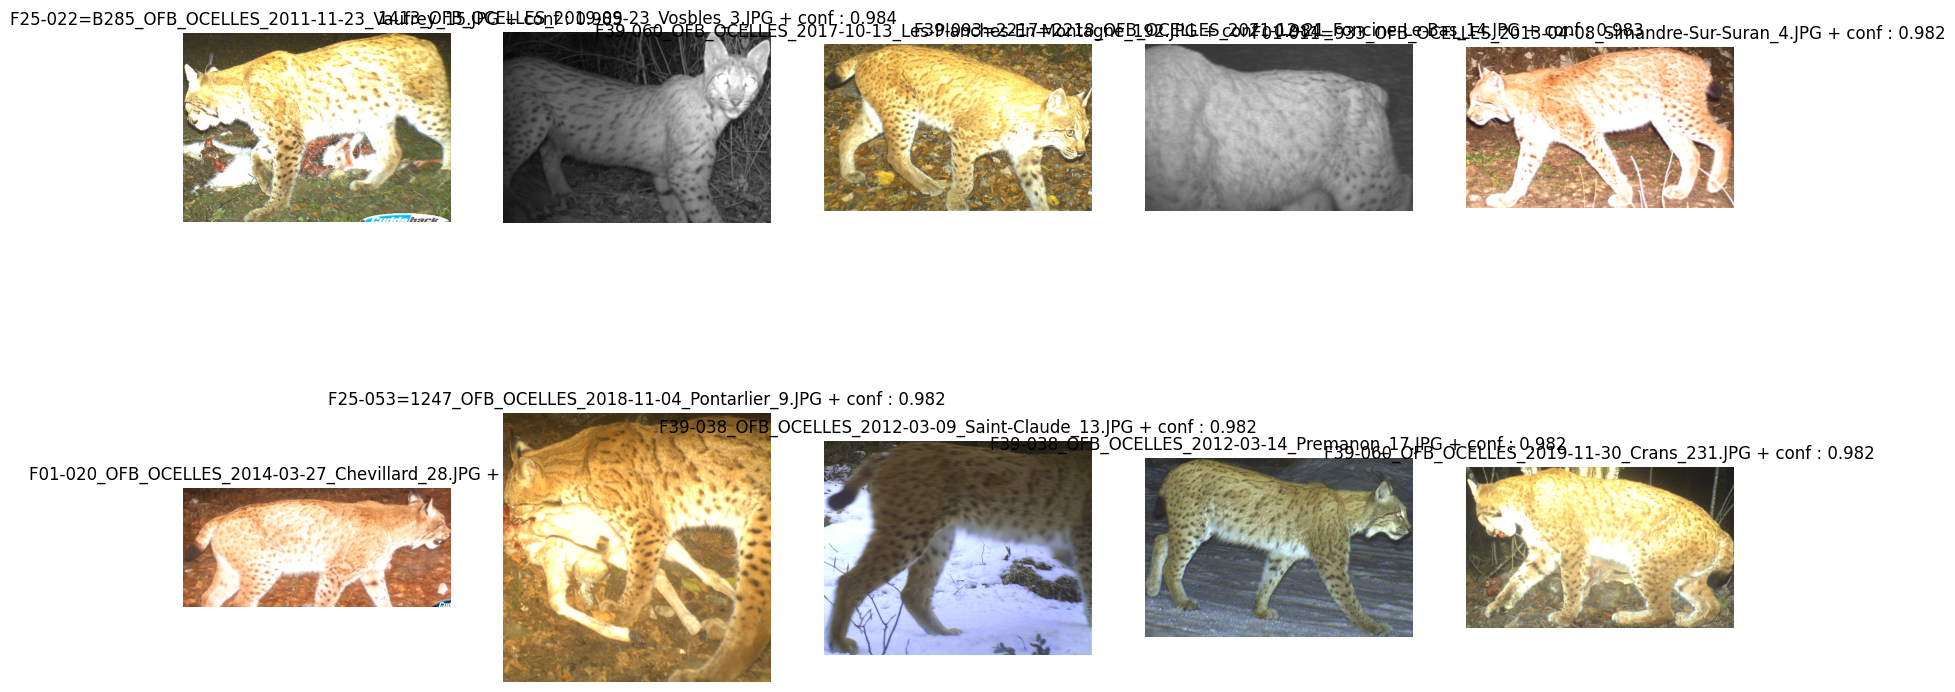

In [16]:
plot_images_conf(df_bbox_france, by="largest")

In [17]:
df_bbox_france_single_detection, df_bbox_france_multiple_detections = separate_single_multiple_df(df_bbox_france)

print(len(df_bbox_france_single_detection))
print(len(df_bbox_france_multiple_detections))

2885
977


In [18]:
df_france_with_bbox = pd.merge(df_france, df_bbox_france_single_detection[['file', 'conf', 'x', 'y', 'width', 'height']], how='inner', left_on='filepath', right_on='file')
df_france_with_bbox = df_france_with_bbox.drop('file', axis=1)

df_france_with_bbox

filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
2880  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
2881  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
2882  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
2883  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
2884  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern       date     location image_number   conf       x       y  \
0         NA 2012-04-27           NA            5  0.938  0.3298  0.5274   
1         NA 2012-05-05           NA            1  0.894  0.2624  0.3661   
2         NA 2012-03-17           NA            3  0.939  0.4602  0.4109   
3         NA 2012-03-16           NA            6  0.965  0.3221  0.3369   
4         NA 2012-03-05           NA            7  0.970  0.4532  0.2915   
...      ...        ...          ...          ...    ...     ...     ...   
2880   SPOTS 2015-07-21      Goumois            4  0.925  0.1290  0.3336   
2881   SPOTS 2015-07-21      Goumois            3  0.949  0.2463  0.2549   
2882   SPOTS 2015-07-21      Goumois            1  0.902  0.2348  0.4391   
2883   SPOTS 2017-08-08  Chaux-Neuve            2  0.959  0.6979  0.4213   
2884   SPOTS 2017-08-08  Chaux-Neuve            1  0.964  0.3377  0.5372   

       width  height  
0     0.2156  0.1445  
1     0.2887  0.6284  
2     0.2870  0.2329  
3     0.2295  0.2594  
4     0.3366  0.3625  
...      ...     ...  
2880  0.7341  0.6643  
2881  0.7536  0.7164  
2882  0.5089  0.4739  
2883  0.1828  0.1270  
2884  0.1343  0.1920  

[2885 rows x 12 columns]

In [19]:
df_france.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_france.csv", index=False)

## Croatian dataset

**Don't forget to generate bounding boxes**.  
Execute the following commands in a compute node:
- `srun --ntasks=1 --gres=gpu:1 --ntasks-per-node=1 --nodes=1 --hint=nomultithread --qos=qos_gpu-dev --account=ads@v100 --cpus-per-task 8 --pty bash`
- `source setup_env.sh`
- `python $LYNX_PROJECT/data_pipeline/megadetector/MegaDetector/detection/run_detector_batch.py $LYNX_PROJECT/data_pipeline/megadetector/md_v5a.0.0.pt "$ALL_CCFRSCRATCH/datasets/extracted/croatia/lynx_pic" /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/bbox_croatia.json --recursive --quiet --threshold 0.1`

In [20]:
df_croatia = pd.read_excel("/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/list_of_lynx_photos1.xlsx")
df_croatia

datum_vrijeme  pouzdanost  broj_zivotinja  broj_mladih  \
0    2016-05-19 01:15:00           1               1            0   
1    2016-10-22 03:18:00           1               1            0   
2    2016-10-23 11:35:00           1               1            0   
3    2013-12-10 10:21:00           1               1            0   
4    2014-09-13 17:49:00           1               1            0   
...                  ...         ...             ...          ...   
2007 2023-05-13 18:06:00           1               1            0   
2008 2022-04-05 05:31:00           1               1            0   
2009 2023-10-20 06:40:00           1               2            1   
2010 2023-10-20 06:40:00           1               2            1   
2011 2023-11-06 07:19:00           1               1            0   

                                      img                      oznaka    ime  \
0                     lynx/photos/RIS.JPG               Varošina 2016  Image   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09  Image   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09  Image   
3                lynx/photos/PICT0236.JPG                     Pakleni  Image   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik  Image   
...                                   ...                         ...    ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35  Image   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim  Image   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023  Image   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2  Image   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2  Image   

                      naziv     spol                             lokacija  \
0          Geonatura d.o.o.  Unknown          POINT (15.439715 44.630702)   
1                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
2                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
3              NP Paklenica  Unknown  POINT (15.4829004594 44.3279410748)   
4              NP Paklenica  Unknown  POINT (15.4792073827 44.3398982543)   
...                     ...      ...                                  ...   
2007  Veterinarski fakultet        M          POINT (14.949509 45.144032)   
2008             PP Velebit        M          POINT (15.043362 44.881497)   
2009  Veterinarski fakultet  Unknown           POINT (15.24886 44.828308)   
2010  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   
2011  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   

     slikana_strana_zivotinje        lat        lon  
0                       right  15.439715  44.630702  
1                        left  14.910703  45.232780  
2                       right  14.910703  45.232780  
3                        none  15.482900  44.327941  
4                        left  15.479207  44.339898  
...                       ...        ...        ...  
2007                     left  14.949509  45.144032  
2008                     left  15.043362  44.881497  
2009                     left  15.248860  44.828308  
2010                     left  15.248860  44.828308  
2011                     left  15.248860  44.828308  

[2012 rows x 13 columns]

#### Column renaming

In [21]:
names = {
    "datum_vrijeme": "date",
    "img": "filepath",
    "oznaka": "lynx_id",
    "spol": "sex",
    "lat": "latitude",
    "lon": "longitude",
    "slikana_strana_zivotinje": "side",
    "broj_zivotinja": "number_animals",
    "broj_mladih": "number_children",
    "naziv": "source", # doubt
}

df_croatia.rename(columns=names, inplace=True)
df_croatia

date  pouzdanost  number_animals  number_children  \
0    2016-05-19 01:15:00           1               1                0   
1    2016-10-22 03:18:00           1               1                0   
2    2016-10-23 11:35:00           1               1                0   
3    2013-12-10 10:21:00           1               1                0   
4    2014-09-13 17:49:00           1               1                0   
...                  ...         ...             ...              ...   
2007 2023-05-13 18:06:00           1               1                0   
2008 2022-04-05 05:31:00           1               1                0   
2009 2023-10-20 06:40:00           1               2                1   
2010 2023-10-20 06:40:00           1               2                1   
2011 2023-11-06 07:19:00           1               1                0   

                                 filepath                     lynx_id    ime  \
0                     lynx/photos/RIS.JPG               Varošina 2016  Image   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09  Image   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09  Image   
3                lynx/photos/PICT0236.JPG                     Pakleni  Image   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik  Image   
...                                   ...                         ...    ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35  Image   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim  Image   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023  Image   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2  Image   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2  Image   

                     source      sex                             lokacija  \
0          Geonatura d.o.o.  Unknown          POINT (15.439715 44.630702)   
1                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
2                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
3              NP Paklenica  Unknown  POINT (15.4829004594 44.3279410748)   
4              NP Paklenica  Unknown  POINT (15.4792073827 44.3398982543)   
...                     ...      ...                                  ...   
2007  Veterinarski fakultet        M          POINT (14.949509 45.144032)   
2008             PP Velebit        M          POINT (15.043362 44.881497)   
2009  Veterinarski fakultet  Unknown           POINT (15.24886 44.828308)   
2010  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   
2011  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   

       side   latitude  longitude  
0     right  15.439715  44.630702  
1      left  14.910703  45.232780  
2     right  14.910703  45.232780  
3      none  15.482900  44.327941  
4      left  15.479207  44.339898  
...     ...        ...        ...  
2007   left  14.949509  45.144032  
2008   left  15.043362  44.881497  
2009   left  15.248860  44.828308  
2010   left  15.248860  44.828308  
2011   left  15.248860  44.828308  

[2012 rows x 13 columns]

#### Drop useless columns
- lokacija=localisation : useless because this information is found in latitude and longitude
- pouzdanost=reliability : useless because always the same value (1)
- ime=image : useless because always the same value (Image)

In [22]:
df_croatia.drop(columns=["lokacija", "pouzdanost", "ime"], inplace=True)
df_croatia

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
2007 2023-05-13 18:06:00               1                0   
2008 2022-04-05 05:31:00               1                0   
2009 2023-10-20 06:40:00               2                1   
2010 2023-10-20 06:40:00               2                1   
2011 2023-11-06 07:19:00               1                0   

                                 filepath                     lynx_id  \
0                     lynx/photos/RIS.JPG               Varošina 2016   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09   
3                lynx/photos/PICT0236.JPG                     Pakleni   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik   
...                                   ...                         ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2   

                     source      sex   side   latitude  longitude  
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  
1                JU Priroda        M   left  14.910703  45.232780  
2                JU Priroda        M  right  14.910703  45.232780  
3              NP Paklenica  Unknown   none  15.482900  44.327941  
4              NP Paklenica  Unknown   left  15.479207  44.339898  
...                     ...      ...    ...        ...        ...  
2007  Veterinarski fakultet        M   left  14.949509  45.144032  
2008             PP Velebit        M   left  15.043362  44.881497  
2009  Veterinarski fakultet  Unknown   left  15.248860  44.828308  
2010  Veterinarski fakultet        Z   left  15.248860  44.828308  
2011  Veterinarski fakultet        Z   left  15.248860  44.828308  

[2012 rows x 10 columns]

#### Duplicates

There are no duplicate lines.

In [23]:
df_croatia.duplicated().value_counts()

False    2012
Name: count, dtype: int64

However, some filepaths repeat themselves. **Some images may have several individuals on them. The associated lynx_id are therefore different.**

In [24]:
filepath_value_counts = df_croatia["filepath"].value_counts()
filepath_value_counts[filepath_value_counts != 1]

filepath
lynx/photos/1_27.JPG                        4
lynx/photos/1_5.JPG                         4
lynx/photos/04.12.20_mlad_1_L.png           3
lynx/photos/19.08.2020_Crna_ruja_2.JPG      3
lynx/photos/19.08.2020_Crna_ruja_1.JPG      3
                                           ..
lynx/photos/Screenshot_82.png               2
lynx/photos/IMG_0240_ulBxe30.JPG            2
lynx/photos/3._sterna_09.10_3.JPG           2
lynx/photos/I_00013b_Pcys5fy.JPG            2
lynx/photos/2023_01_24__Golo_trlo_11.JPG    2
Name: count, Length: 110, dtype: int64

In [25]:
df_croatia[df_croatia["filepath"] == "lynx/photos/1_5.JPG"]

date  number_animals  number_children  \
1715 2023-02-04 18:15:00               4                3   
1716 2023-02-04 18:15:00               4                3   
1717 2023-02-04 18:15:00               4                3   
1718 2023-02-04 18:15:00               4                3   

                 filepath              lynx_id             source      sex  \
1715  lynx/photos/1_5.JPG  Suzi mladunac3 2022  Rewilding Velebit  Unknown   
1716  lynx/photos/1_5.JPG  Suzi mladunac2 2022  Rewilding Velebit  Unknown   
1717  lynx/photos/1_5.JPG  Suzi mladunac1 2022  Rewilding Velebit  Unknown   
1718  lynx/photos/1_5.JPG                 Suzi  Rewilding Velebit        Z   

       side   latitude  longitude  
1715  right  14.958253  44.677339  
1716  right  14.958253  44.677339  
1717  right  14.958253  44.677339  
1718  right  14.958253  44.677339

**Note**: it seems complicated to use images with several lynxes in a single image. This is because we don't know which lynx the `lynx_id` refers to in the image.

In [26]:
df_croatia_multiple_animals = df_croatia[df_croatia['number_animals'] > 1]
df_croatia = df_croatia[df_croatia['number_animals'] == 1].copy()

In [27]:
print(len(df_croatia_multiple_animals))
print(len(df_croatia))

305
1707


#### Fix filepath

Checks whether all filepaths currently contain the same prefix

In [28]:
df_croatia["filepath"].str.startswith("lynx/photos/").all()

True

In [29]:
df_croatia["filepath"] = df_croatia["filepath"].str.replace("lynx/photos/", "/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/")
df_croatia

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
2005 2023-04-20 00:02:00               1                0   
2006 2023-05-11 12:40:00               1                0   
2007 2023-05-13 18:06:00               1                0   
2008 2022-04-05 05:31:00               1                0   
2011 2023-11-06 07:19:00               1                0   

                                               filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Varošina 2016   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        Pakleni   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...            Nik   
...                                                 ...            ...   
2005  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2006  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2007  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2008  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
2011  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source      sex   side   latitude  longitude  
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  
1                JU Priroda        M   left  14.910703  45.232780  
2                JU Priroda        M  right  14.910703  45.232780  
3              NP Paklenica  Unknown   none  15.482900  44.327941  
4              NP Paklenica  Unknown   left  15.479207  44.339898  
...                     ...      ...    ...        ...        ...  
2005  Veterinarski fakultet        M   left  14.949509  45.144032  
2006  Veterinarski fakultet        M   left  14.949509  45.144032  
2007  Veterinarski fakultet        M   left  14.949509  45.144032  
2008             PP Velebit        M   left  15.043362  44.881497  
2011  Veterinarski fakultet        Z   left  15.248860  44.828308  

[1707 rows x 10 columns]

#### Deleting broken images

In [30]:
all_files_exist = all(df_croatia['filepath'].apply(os.path.exists))
all_files_exist

True

#### Date

The dates are already in `datetime64[ns]` format. This is the format used for df_france.

In [31]:
df_croatia.dtypes

date               datetime64[ns]
number_animals              int64
number_children             int64
filepath                   object
lynx_id                    object
source                     object
sex                        object
side                       object
latitude                  float64
longitude                 float64
dtype: object

#### Bounding Boxes

In [32]:
with open('/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/bbox_croatia.json', 'r') as f:
    bbox_croatia = json.load(f)

In [33]:
no_bbox_croatia, multiple_bbox_croatia = get_no_and_multiple_bbox(bbox_croatia)

8 images have no bounding boxes detected.
186 images have several bounding boxes detected.
Total: 1862 images.


In [34]:
df_bbox_croatia = flatten_bbox(bbox_croatia)
df_bbox_croatia

No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/16.09_Toni.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMAG0019.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMAG0219.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMG_20190324_170737.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMG_20190324_170806.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/I_00009a_GWWMeqZ.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/Otocac_M51_2019-12-26_16-11-56.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/Snimka_zaslona_133.png


file category   conf  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.976   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.978   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.973   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.969   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.957   
...                                                 ...      ...    ...   
2078  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.434   
2079  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.882   
2080  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.517   
2081  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.907   
2082  /gpfsscratch/rech/ads/commun/datasets/extracte...        1  0.917   

           x       y    width   height  
0     0.5151  0.5040  0.48330  0.46370  
1     0.3761  0.2525  0.62380  0.68590  
2     0.5453  0.3566  0.44650  0.64040  
3     0.3967  0.4929  0.14940  0.24740  
4     0.3839  0.2187  0.61600  0.77670  
...      ...     ...      ...      ...  
2078  0.5418  0.5641  0.07812  0.09666  
2079  0.1362  0.5050  0.20180  0.14240  
2080  0.5368  0.5650  0.08375  0.10160  
2081  0.1643  0.5150  0.21810  0.18990  
2082  0.5487  0.5289  0.16050  0.10000  

[2083 rows x 7 columns]

#### 10 images cropped with the least confidence are displayed

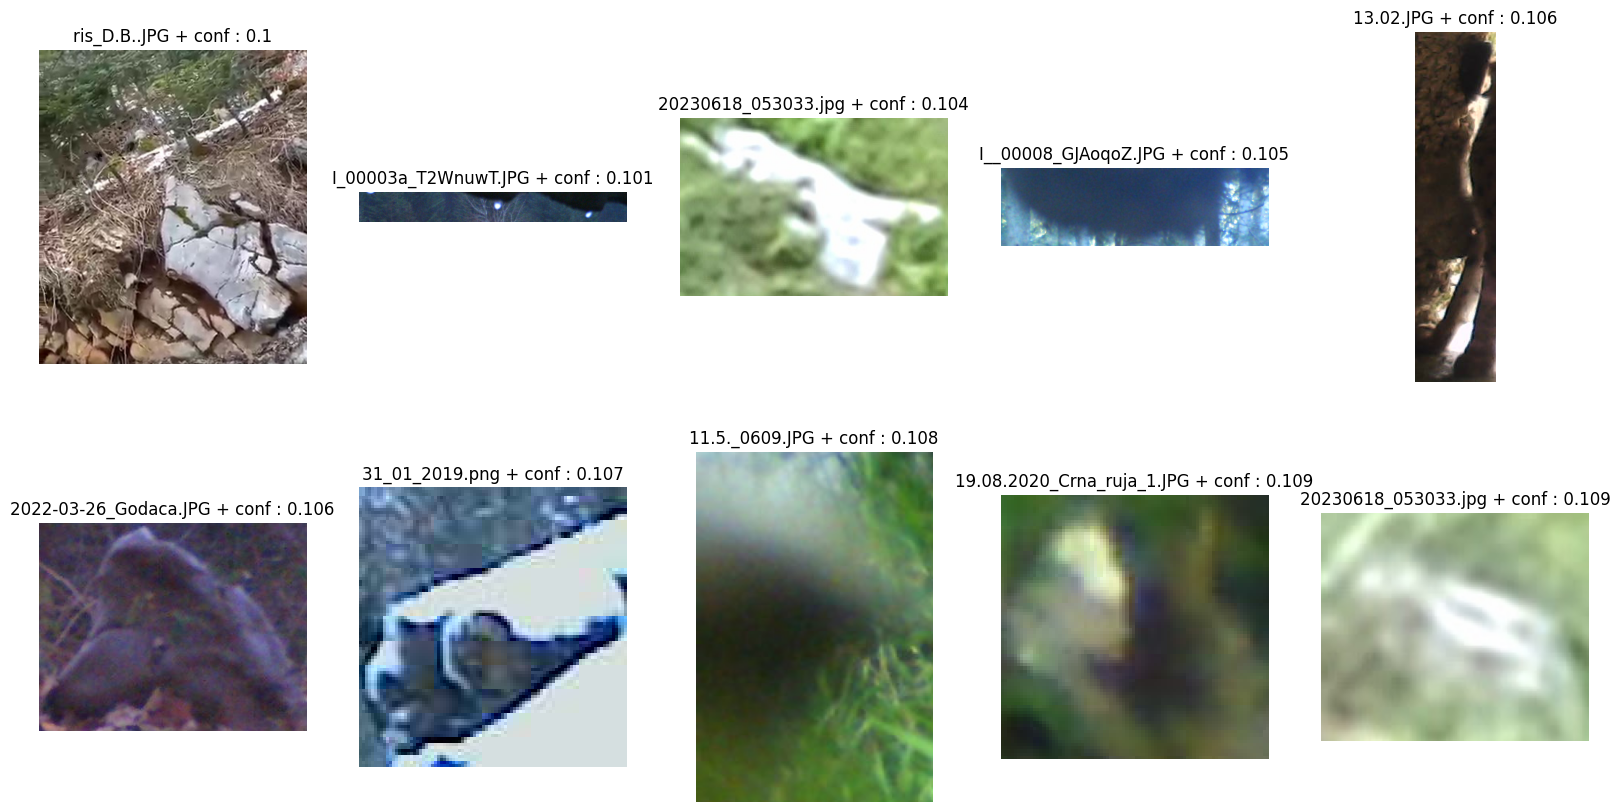

In [35]:
plot_images_conf(df_bbox_croatia, by="smallest")

#### 10 images cropped with the largest confidence are displayed

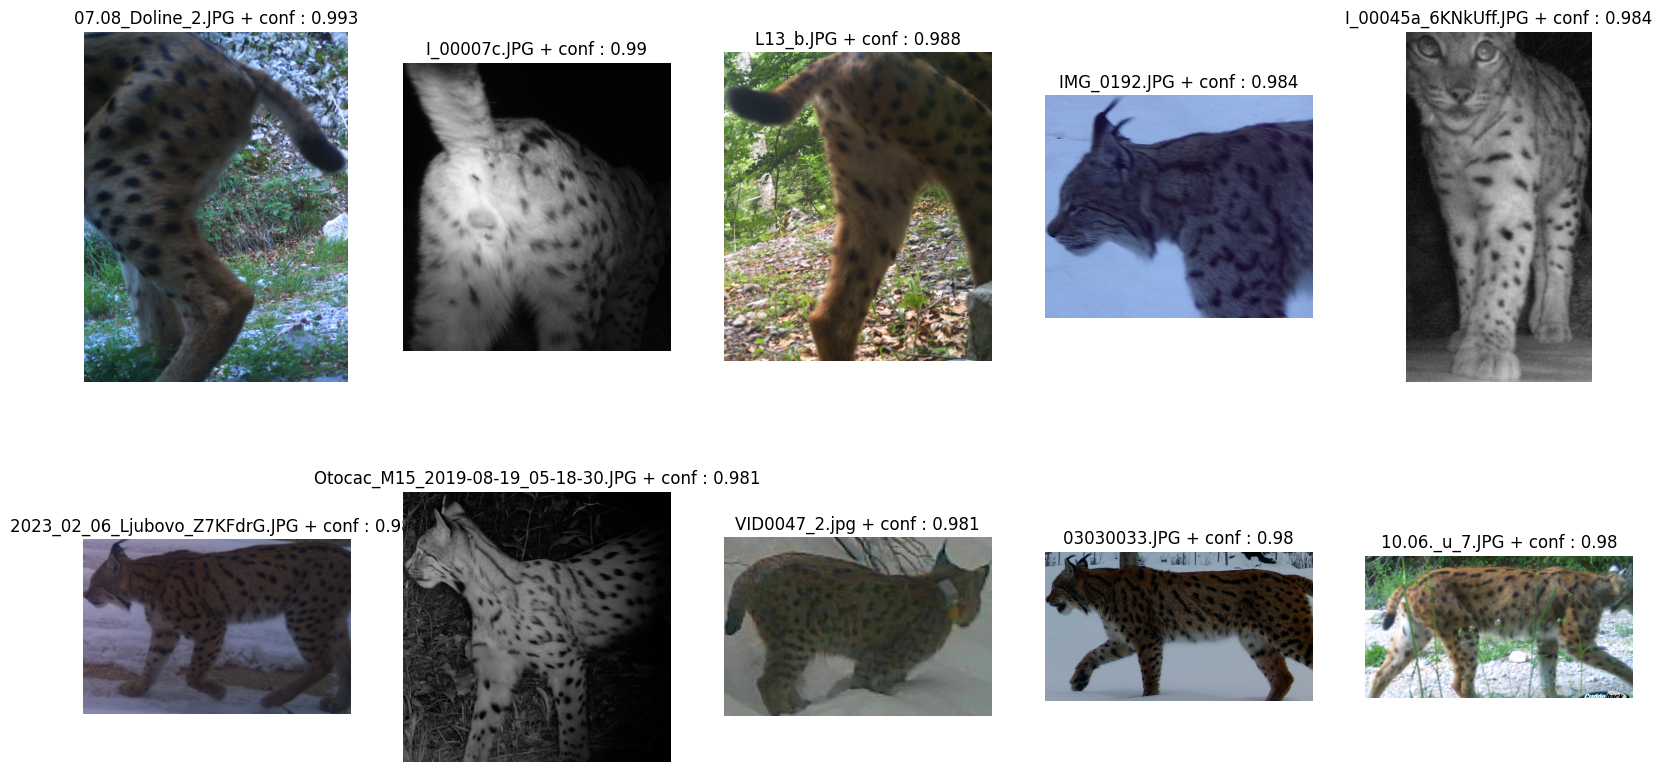

In [36]:
plot_images_conf(df_bbox_croatia, by="largest")

In [37]:
df_bbox_croatia_single_detection, df_bbox_croatia_multiple_detections = separate_single_multiple_df(df_bbox_croatia)

print(len(df_bbox_croatia_single_detection), len(df_bbox_croatia_multiple_detections))

1668 415


In [38]:
df_croatia_with_bbox = pd.merge(df_croatia, df_bbox_croatia_single_detection[['file', 'conf', 'x', 'y', 'width', 'height']], how='inner', left_on='filepath', right_on='file')
df_croatia_with_bbox = df_croatia_with_bbox.drop('file', axis=1)

df_croatia_with_bbox

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
1561 2023-04-20 00:02:00               1                0   
1562 2023-05-11 12:40:00               1                0   
1563 2023-05-13 18:06:00               1                0   
1564 2022-04-05 05:31:00               1                0   
1565 2023-11-06 07:19:00               1                0   

                                               filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Varošina 2016   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        Pakleni   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...            Nik   
...                                                 ...            ...   
1561  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1562  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1563  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1564  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
1565  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source      sex   side   latitude  longitude   conf  \
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  0.932   
1                JU Priroda        M   left  14.910703  45.232780  0.915   
2                JU Priroda        M  right  14.910703  45.232780  0.944   
3              NP Paklenica  Unknown   none  15.482900  44.327941  0.822   
4              NP Paklenica  Unknown   left  15.479207  44.339898  0.936   
...                     ...      ...    ...        ...        ...    ...   
1561  Veterinarski fakultet        M   left  14.949509  45.144032  0.951   
1562  Veterinarski fakultet        M   left  14.949509  45.144032  0.840   
1563  Veterinarski fakultet        M   left  14.949509  45.144032  0.897   
1564             PP Velebit        M   left  15.043362  44.881497  0.952   
1565  Veterinarski fakultet        Z   left  15.248860  44.828308  0.924   

            x       y   width  height  
0     0.41240  0.4479  0.1701  0.1360  
1     0.25140  0.3058  0.3014  0.2613  
2     0.07031  0.3641  0.4531  0.3607  
3     0.41510  0.3328  0.2226  0.1164  
4     0.49600  0.4142  0.2031  0.3129  
...       ...     ...     ...     ...  
1561  0.46000  0.4033  0.1537  0.2133  
1562  0.54620  0.3650  0.0700  0.2725  
1563  0.47060  0.4050  0.1456  0.2074  
1564  0.06424  0.6219  0.1837  0.2579  
1565  0.41650  0.4560  0.2270  0.2135  

[1566 rows x 15 columns]

In [39]:
df_croatia.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_dataset_croatia.csv", index=False)

## Merge the two dataframes

In [41]:
df_full = pd.concat([df_france_with_bbox, df_croatia_with_bbox], ignore_index=True)
df_full

filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
...                                                 ...            ...   
4446  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4447  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4448  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4449  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
4450  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source pattern                date location image_number  \
0                       OCS      NA 2012-04-27 00:00:00       NA            5   
1                       OCS      NA 2012-05-05 00:00:00       NA            1   
2                       OCS      NA 2012-03-17 00:00:00       NA            3   
3                       OCS      NA 2012-03-16 00:00:00       NA            6   
4                       OCS      NA 2012-03-05 00:00:00       NA            7   
...                     ...     ...                 ...      ...          ...   
4446  Veterinarski fakultet     NaN 2023-04-20 00:02:00      NaN          NaN   
4447  Veterinarski fakultet     NaN 2023-05-11 12:40:00      NaN          NaN   
4448  Veterinarski fakultet     NaN 2023-05-13 18:06:00      NaN          NaN   
4449             PP Velebit     NaN 2022-04-05 05:31:00      NaN          NaN   
4450  Veterinarski fakultet     NaN 2023-11-06 07:19:00      NaN          NaN   

       conf        x       y   width  height  number_animals  number_children  \
0     0.938  0.32980  0.5274  0.2156  0.1445             NaN              NaN   
1     0.894  0.26240  0.3661  0.2887  0.6284             NaN              NaN   
2     0.939  0.46020  0.4109  0.2870  0.2329             NaN              NaN   
3     0.965  0.32210  0.3369  0.2295  0.2594             NaN              NaN   
4     0.970  0.45320  0.2915  0.3366  0.3625             NaN              NaN   
...     ...      ...     ...     ...     ...             ...              ...   
4446  0.951  0.46000  0.4033  0.1537  0.2133             1.0              0.0   
4447  0.840  0.54620  0.3650  0.0700  0.2725             1.0              0.0   
4448  0.897  0.47060  0.4050  0.1456  0.2074             1.0              0.0   
4449  0.952  0.06424  0.6219  0.1837  0.2579             1.0              0.0   
4450  0.924  0.41650  0.4560  0.2270  0.2135             1.0              0.0   

      sex  side   latitude  longitude  
0     NaN   NaN        NaN        NaN  
1     NaN   NaN        NaN        NaN  
2     NaN   NaN        NaN        NaN  
3     NaN   NaN        NaN        NaN  
4     NaN   NaN        NaN        NaN  
...   ...   ...        ...        ...  
4446    M  left  14.949509  45.144032  
4447    M  left  14.949509  45.144032  
4448    M  left  14.949509  45.144032  
4449    M  left  15.043362  44.881497  
4450    Z  left  15.248860  44.828308  

[4451 rows x 18 columns]

In [42]:
df_full.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv", index=False)